In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
train_path = r'D:\UNH Materials\ml-zoomcamp-2024\7. Deep Learning\data\data\train\\'
test_path = r'D:\UNH Materials\ml-zoomcamp-2024\7. Deep Learning\data\data\test\\'

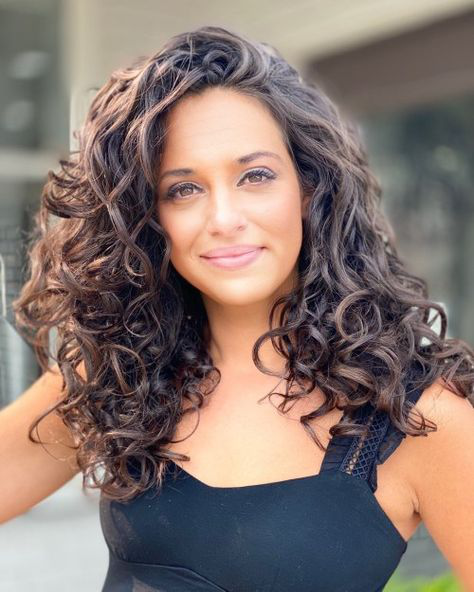

In [4]:
path = train_path + 'curly'
name = '5d6da4c89b006262ecfab1f48c5e197f (3).jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [5]:
# Define the model
model = Sequential()

# Input layer and first convolutional layer
model.add(Conv2D(
    filters=32, 
    kernel_size=(3, 3), 
    activation='relu', 
    input_shape=(200, 200, 3)
))

# Max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer to convert 2D data to 1D
model.add(Flatten())

# Fully connected layer with 64 neurons
model.add(Dense(units=64, activation='relu'))

# Output layer for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
optimizer = SGD(learning_rate=0.002, momentum=0.8)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 313632)            0         
                                                                 
 dense (Dense)               (None, 64)                20072512  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 20073473 (76.57 MB)
Trainable params: 20073473 (76.57 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [6]:
train_gen = ImageDataGenerator(rescale=1./255)
 
train_ds = train_gen.flow_from_directory(
    train_path,
    target_size=(200, 200),
    batch_size=20,
    shuffle = True,
    class_mode = "binary"
)

test_gen = ImageDataGenerator(rescale=1./255)
 
test_ds = test_gen.flow_from_directory(
    test_path,
    target_size=(200, 200),
    batch_size=20,
    shuffle=True,
    class_mode = "binary"
)

Found 800 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [7]:
steps_per_epoch = train_ds.n//train_ds.batch_size
validation_steps = test_ds.n//test_ds.batch_size
history = model.fit(
    train_ds,
    epochs=10,
    steps_per_epoch = steps_per_epoch,
    validation_data=test_ds,
    validation_steps = validation_steps
)

Epoch 1/10


40/40 [==============================] - 28s 669ms/step - loss: 0.6761 - accuracy: 0.5738 - val_loss: 0.6573 - val_accuracy: 0.5900
Epoch 2/10
40/40 [==============================] - 14s 357ms/step - loss: 0.5672 - accuracy: 0.6888 - val_loss: 0.6436 - val_accuracy: 0.6650
Epoch 3/10
40/40 [==============================] - 14s 340ms/step - loss: 0.5492 - accuracy: 0.7163 - val_loss: 0.6033 - val_accuracy: 0.6750
Epoch 4/10
40/40 [==============================] - 15s 371ms/step - loss: 0.5216 - accuracy: 0.7487 - val_loss: 0.5875 - val_accuracy: 0.6800
Epoch 5/10
40/40 [==============================] - 15s 372ms/step - loss: 0.4831 - accuracy: 0.7750 - val_loss: 0.5741 - val_accuracy: 0.6850
Epoch 6/10
40/40 [==============================] - 14s 364ms/step - loss: 0.4595 - accuracy: 0.7763 - val_loss: 0.6176 - val_accuracy: 0.6400
Epoch 7/10
40/40 [==============================] - 15s 358ms/step - loss: 0.4330 - accuracy: 0.8075 - val_loss: 0.5656 - val_accuracy: 0.72

In [8]:
print(np.median(history.history['accuracy']))
print(np.std(history.history['loss']))

0.7756249904632568
0.09544869188868192


In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale the pixel values to [0, 1]
    rotation_range=50,  # Random rotations in the range of 50 degrees
    width_shift_range=0.1,  # Random horizontal shift of 10%
    height_shift_range=0.1,  # Random vertical shift of 10%
    zoom_range=0.1,  # Random zoom of up to 10%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill missing pixels with the nearest pixel value
)
 
train_ds = train_gen.flow_from_directory(
    train_path,
    target_size=(200, 200),
    batch_size=20,
    shuffle = True,
    class_mode = "binary"
)

test_gen = ImageDataGenerator(rescale=1./255)
 
test_ds = test_gen.flow_from_directory(
    test_path,
    target_size=(200, 200),
    batch_size=20,
    shuffle=True,
    class_mode = "binary"
)

Found 800 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [10]:
history = model.fit(
    train_ds,
    epochs=20,
    initial_epoch=10,
    steps_per_epoch = steps_per_epoch,
    validation_data=test_ds,
    validation_steps = validation_steps
)

Epoch 11/20
40/40 [==============================] - 16s 397ms/step - loss: 0.3189 - accuracy: 0.8737 - val_loss: 0.6530 - val_accuracy: 0.6850
Epoch 12/20
40/40 [==============================] - 16s 387ms/step - loss: 0.2877 - accuracy: 0.8950 - val_loss: 0.5223 - val_accuracy: 0.7300
Epoch 13/20
40/40 [==============================] - 15s 376ms/step - loss: 0.2499 - accuracy: 0.9200 - val_loss: 0.5452 - val_accuracy: 0.6900
Epoch 14/20
40/40 [==============================] - 15s 390ms/step - loss: 0.2301 - accuracy: 0.9325 - val_loss: 0.6092 - val_accuracy: 0.7200
Epoch 15/20
40/40 [==============================] - 16s 385ms/step - loss: 0.2385 - accuracy: 0.9200 - val_loss: 0.5393 - val_accuracy: 0.7150
Epoch 16/20
40/40 [==============================] - 15s 378ms/step - loss: 0.1950 - accuracy: 0.9400 - val_loss: 0.5801 - val_accuracy: 0.7250
Epoch 17/20
40/40 [==============================] - 15s 372ms/step - loss: 0.1478 - accuracy: 0.9625 - val_loss: 0.7514 - val_accuracy:

In [11]:
print(np.mean(history.history['val_loss']))
print(np.mean(history.history['val_accuracy'][5:]))

0.6168826818466187
0.7210000038146973
